In [145]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
from fsl_mrs.utils import mrs_io,plotting,fitting
from fsl_mrs.core import MRS


datafolder  = '/Users/saad/Desktop/Spectroscopy/RealData'
basisfile   = '/Users/saad/Desktop/Spectroscopy/RealData/7T_steam11ms_2015_oxford_lb1.BASIS'
# basisfile   = '/Users/saad/Desktop/Spectroscopy/RealData/Spinach_STEAM_11ms_7T_AllMetabs4'
datafile    = '2015_39_001_OCC.RAW'


# Load data and basis
FID,FIDheader       = mrs_io.read_FID(os.path.join(datafolder,datafile))
basis,names,Bheader = mrs_io.read_basis(basisfile)
cf = FIDheader['centralFrequency']
bw = FIDheader['bandwidth']


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/saad/Git/fsl_mrs/fsl_mrs/utils/fitting.py:530: RuntimeWarning:

divide by zero encountered in true_divide

/Users/saad/Git/fsl_mrs/fsl_mrs/utils/fitting.py:163: RuntimeWarning:

divide by zero encountered in double_scalars

/Users/saad/Git/fsl_mrs/fsl_mrs/utils/fitting.py:173: RuntimeWarning:

invalid value encountered in multiply



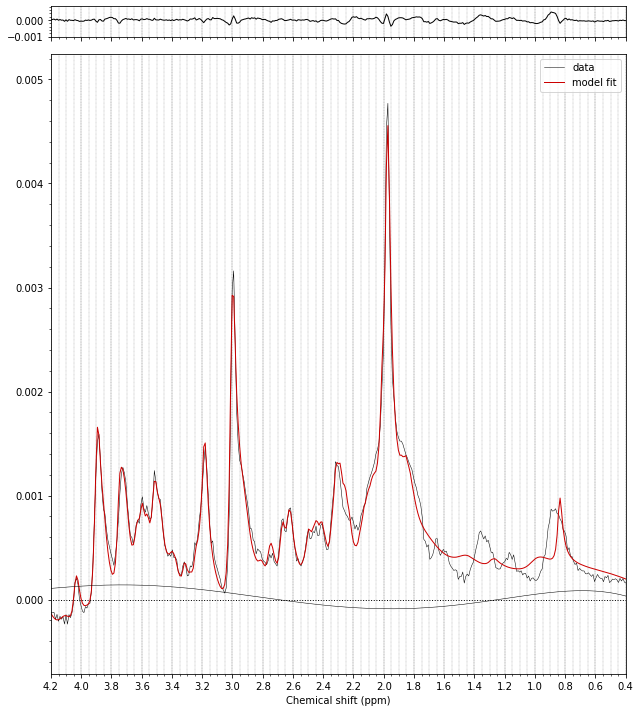

In [173]:

MRSArgs = {'bw':bw,'cf':cf,'basis':basis,'names':names}
FitArgs = {'method':'Newton',
          'baseline_order':2,
          'ppmlim':(0.2,4.2)}

mrs1 = MRS(FID=FID,**MRSArgs)
mrs1.keep(['NAA','Cr','PCr'])
res1 = fitting.fit_FSLModel(mrs1,**FitArgs) 

gamma,eps = res1.gamma,res1.eps
new_basis = mrs.basis*np.exp(-(gamma+1j*eps)*mrs1.timeAxis)    
  
MRSArgs = {'bw':bw,'cf':cf,'basis':new_basis,'names':names}
mrs2 = MRS(FID=FID,**MRSArgs)

# nMM  = mrs2.add_MM_peaks(gamma=100)
metab_groups = [0]*len(names)
# grot         = [i+max(metab_groups)+1 for i in range(nMM)]
# metab_groups = metab_groups + grot

FitArgs = {'method':'Newton',
          'baseline_order':5,
          'ppmlim':(0.2,4.2)}

res2 = fitting.fit_FSLModel(mrs2,**FitArgs,metab_groups=metab_groups) 

_ = plotting.plot_fit(mrs2,pred=res2.pred,baseline=res2.baseline)


In [174]:
res2.params_names

['mm',
 'Ala',
 'Asc',
 'Asp',
 'GPC',
 'PCho',
 'Cr',
 'PCr',
 'GABA',
 'Glc',
 'Gln',
 'Glu',
 'GSH',
 'Gly',
 'Ins',
 'Lac',
 'NAA',
 'NAAG',
 'PE',
 'Scyllo',
 'Tau',
 'G_glu',
 'G_gly',
 'gamma_0',
 'eps_0',
 'Phi0',
 'Phi1',
 'B_real_0',
 'B_real_1',
 'B_real_2',
 'B_real_3',
 'B_real_4',
 'B_real_5',
 'B_imag_0',
 'B_imag_1',
 'B_imag_2',
 'B_imag_3',
 'B_imag_4',
 'B_imag_5']

In [180]:

import pandas as pd
df = pd.DataFrame()

df['Measure'] = ['SNR']
df['Value']   = [res2.snr]
df.to_csv('/Users/saad/Desktop/grot1.csv',index=False)

df = pd.DataFrame()

df['Parameter'] = res2.params_names
df['Value']     = res2.params
df.to_csv('/Users/saad/Desktop/grot2.csv',index=False)




In [176]:
res2.params

array([ 0.00000000e+00,  0.00000000e+00,  4.55443247e-04,  6.53790499e-04,
        5.25703677e-04,  9.24089232e-05,  2.22210501e-04,  0.00000000e+00,
        2.70822223e-04,  8.46048245e-04,  6.44808027e-05,  6.05030032e-04,
        1.74448445e-05,  8.46386268e-04,  2.27245143e-04,  8.41176337e-05,
        1.69068105e-04,  1.04006490e-04,  5.03916370e-05,  1.70031676e-04,
        1.17432044e-06,  0.00000000e+00,  1.78119027e-06,  3.45330821e+01,
        6.32244771e+01,  1.05256635e+00,  2.87874411e-04, -6.42688395e-05,
       -9.01898361e-06, -2.21646709e-03,  5.97291561e-03,  5.68899293e-03,
        1.89726649e-04,  3.76611080e-03, -1.10980275e-02, -3.68567424e-03,
        7.07585107e-04, -2.39620551e-03,  5.72874998e-03])

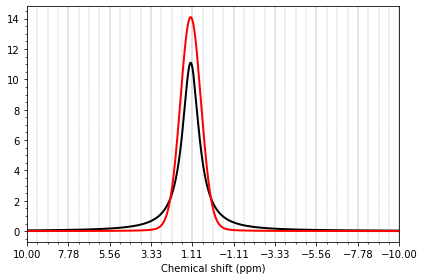

In [119]:
from fsl_mrs.utils import misc

x = misc.create_peak(mrs,1.2,gamma=1000,sigma=0)
_ = plotting.plot_spectrum(x,mrs.bandwidth,mrs.centralFrequency,ppmlim=(-10,10),proj='real')

x = misc.create_peak(mrs,1.2,gamma=0,sigma=1000)
_ = plotting.plot_spectrum(x,mrs.bandwidth,mrs.centralFrequency,ppmlim=(-10,10),proj='real',c='r')

